# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data Science - DS/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


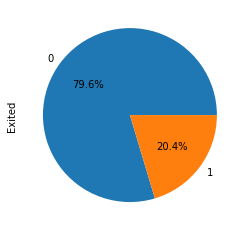

In [ ]:

dt = data.groupby("Exited")["Exited"].count()
dt.plot.pie(autopct="%.1f%%")

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
path = '/content/drive/MyDrive/Data Science - DS/Churn_Modelling.csv'

df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One Hot Encoding

In [ ]:
# One Hot Encoder
df = pd.get_dummies(data, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [ ]:
df['IsActiveMember'] = [-1 if i==0 else 1 for i in df['IsActiveMember']]
df['Gender_Male'] = [-1 if i==0 else 1 for i in df['Gender_Male']]
df['Geography_Germany'] = [-1 if i==0 else 1 for i in df['Geography_Germany']]
df['Geography_Spain'] = [-1 if i==0 else 1 for i in df['Geography_Spain']]
df['HasCrCard'] = [-1 if i==0 else 1 for i in df['HasCrCard']]

In [ ]:
# X = df.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1)
X = df.drop(['Exited','RowNumber','CustomerId','Surname','Tenure','HasCrCard','EstimatedSalary'], axis=1)
# "Tenure", "HasCrCard", "EstimatedSalary"
y = df['Exited']
X

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,0,0,0
1,608,41,83807.86,1,1,0,0,1
2,502,42,159660.80,3,0,0,0,0
3,699,39,0.00,2,0,0,0,0
4,850,43,125510.82,1,1,0,0,1
...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,1,0,0
9996,516,35,57369.61,1,1,1,0,0
9997,709,36,0.00,1,1,0,0,0
9998,772,42,75075.31,2,0,1,1,0


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# balancing dataset SMOTE
X_train = pd.DataFrame(X_train, columns=X.columns)
X_dummy = pd.get_dummies(X_train)
X_dummy = X_dummy.fillna(0)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_train, y_train = smote.fit_resample(X_dummy,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train = undersampling.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=11, activation='relu',kernel_initializer = 'he_uniform'))
ann.add(tf.keras.layers.Dropout(.2, input_shape=(11,)))
ann.add(tf.keras.layers.Dense(units=7, activation='relu', kernel_initializer = 'he_uniform'))
ann.add(tf.keras.layers.Dropout(.2))
ann.add(tf.keras.layers.Dense(units=3, activation='relu',kernel_initializer = 'he_uniform'))
ann.add(tf.keras.layers.Dropout(.2))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer = 'glorot_uniform'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
model_history = ann.fit(X_train, y_train, batch_size = 8, epochs = 100)


Epoch 1/100
830/830 [==============================] - 2s 2ms/step - loss: 0.6967 - accuracy: 0.5301
Epoch 2/100
830/830 [==============================] - 1s 2ms/step - loss: 0.6645 - accuracy: 0.5962
Epoch 3/100
830/830 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6390
Epoch 4/100
830/830 [==============================] - 1s 2ms/step - loss: 0.6130 - accuracy: 0.6633
Epoch 5/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.6961
Epoch 6/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.6995
Epoch 7/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5660 - accuracy: 0.7155
Epoch 8/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7184
Epoch 9/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7259
Epoch 10/100
830/830 [==============================] - 1s 1ms/step - loss: 0.5421 - accura

In [ ]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy'])


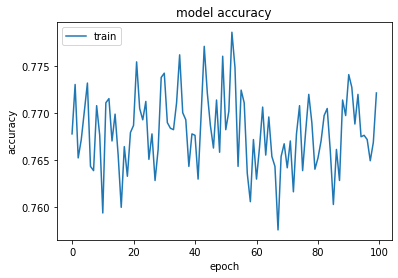

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Train set results

In [ ]:
y_train_pred = ann.predict(X_train)
y_train_pred = [0 if i < 0.5 else 1 for i in y_train_pred]

compare = pd.DataFrame(np.array(y_train), columns=['Actual'])
compare['Predicted'] = y_train_pred

### Predicting the Test set results

In [ ]:
y_test_pred = ann.predict(X_test)
y_test_pred = [0 if i < 0.5 else 1 for i in y_test_pred]

compare = pd.DataFrame(np.array(y_test), columns=['Actual'])
compare['Predicted'] = y_test_pred

In [ ]:
compare

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


### Making the Confusion Matrix

In [ ]:
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    specificity = round((tn) / (tn+fp) * 100, 2)
    npv = round((tn) / (tn+fn) * 100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('Specificity:', specificity, '%')
    print('NPV        :', npv, '%')

In [ ]:
from sklearn.metrics import confusion_matrix
# Training Performance
classification_eval(y_train, y_train_pred, 'ANN Training Perf.')

Evaluation Model: ANN Training Perf.
[[2673  647]
 [ 727 2593]]
Accuracy   : 79.31 %
Precision  : 80.03 %
Recall     : 78.1 %
Specificity: 80.51 %
NPV        : 78.62 %


In [ ]:
# Testing Performance
classification_eval(y_test, y_test_pred, 'ANN Testing Perf.')

Evaluation Model: ANN Testing Perf.
[[1312  311]
 [ 107  270]]
Accuracy   : 79.1 %
Precision  : 46.47 %
Recall     : 71.62 %
Specificity: 80.84 %
NPV        : 92.46 %
